# Data Cleaning and Exploration.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../data/real-estate_flats_riga_all_sell.csv')

# Display the first few rows
print(df.head())


                         Iela:                       Cena Stāvs:  \
0          Saulgožu 27 [Karte]   88 000 € (1 128.21 €/m²)   9/10   
1  Sarkandaugavas 26/6 [Karte]   46 000 € (1 533.33 €/m²)    4/5   
2            Palasta 9 [Karte]  175 000 € (1 861.70 €/m²)    2/3   
3            Stabu 87a [Karte]   83 000 € (1 930.23 €/m²)    4/5   
4         Maskavas 281 [Karte]     43 000 € (895.83 €/m²)   8/12   

         Rajons:   Sērija: Kadastra numurs: Istabas: Platība: Mājas tips:  \
0      Iļģuciems      119.              NaN        3    78 m²      Paneļu   
1  Sarkandaugava    Hrušč.              NaN        1    30 m²     Ķieģeļu   
2        Vecrīga   P. kara              NaN        3    94 m²        Mūra   
3         centrs    Renov.              NaN        2    43 m²     Ķieģeļu   
4      Ķengarags  Čehu pr.              NaN        2    48 m²     Ķieģeļu   

  Pilsēta:                                                URL  \
0     Rīga  https://www.ss.lv/msg/lv/real-estate/flats/rig...  

In [2]:
# Check for missing values
print(df.isnull().sum())

Iela:                  0
Cena                   0
Stāvs:                 0
Rajons:                0
Sērija:                1
Kadastra numurs:    3348
Istabas:               0
Platība:               0
Mājas tips:            2
Pilsēta:               0
URL                    0
Ērtības:            1163
dtype: int64


In [3]:
# Check data types
print(df.dtypes)

Iela:               object
Cena                object
Stāvs:              object
Rajons:             object
Sērija:             object
Kadastra numurs:    object
Istabas:            object
Platība:            object
Mājas tips:         object
Pilsēta:            object
URL                 object
Ērtības:            object
dtype: object


In [4]:
# Convert the 'Cena' column to string type
df['Cena'] = df['Cena'].astype(str)

# Extract only the price from 'Cena' column
df['Cena'] = df['Cena'].str.extract('(\d+\s*\d+)')[0].str.replace(' ', '').astype(float)

# Adjusting 'Platība:' column remains the same
df['Platība:'] = df['Platība:'].astype(str).str.replace(' m²', '').str.replace(',', '').astype(float)



In [5]:
df['Cena']

0        88000.0
1        46000.0
2       175000.0
3        83000.0
4        43000.0
          ...   
3546     58000.0
3547     68000.0
3548    194000.0
3549     44000.0
3550    279000.0
Name: Cena, Length: 3551, dtype: float64

In [6]:
# Display basic statistics
print(df.describe())

                Cena     Platība:
count    3551.000000  3551.000000
mean    97514.463250    63.217204
std     88658.858945    39.431865
min      1110.000000    12.000000
25%     43500.000000    42.000000
50%     65000.000000    54.000000
75%    120000.000000    73.350000
max    850000.000000   643.000000


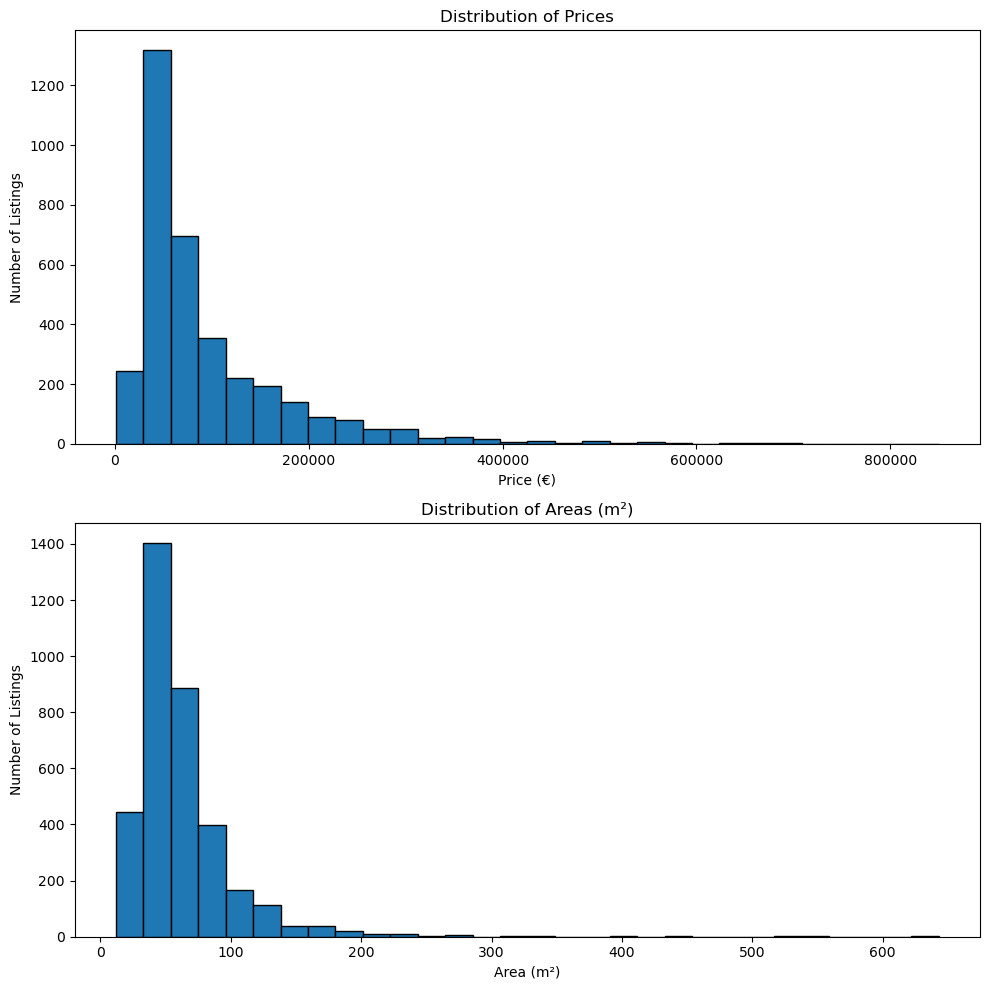

In [7]:
# Set up a 2x1 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Plot histogram for 'Cena'
df['Cena'].plot(ax=axes[0], kind='hist', edgecolor='black', bins=30)
axes[0].set_title('Distribution of Prices')
axes[0].set_xlabel('Price (€)')
axes[0].set_ylabel('Number of Listings')

# Plot histogram for 'Platība'
df['Platība:'].plot(ax=axes[1], kind='hist', edgecolor='black', bins=30)
axes[1].set_title('Distribution of Areas (m²)')
axes[1].set_xlabel('Area (m²)')
axes[1].set_ylabel('Number of Listings')

# Adjust layout and display
plt.tight_layout()
plt.show()


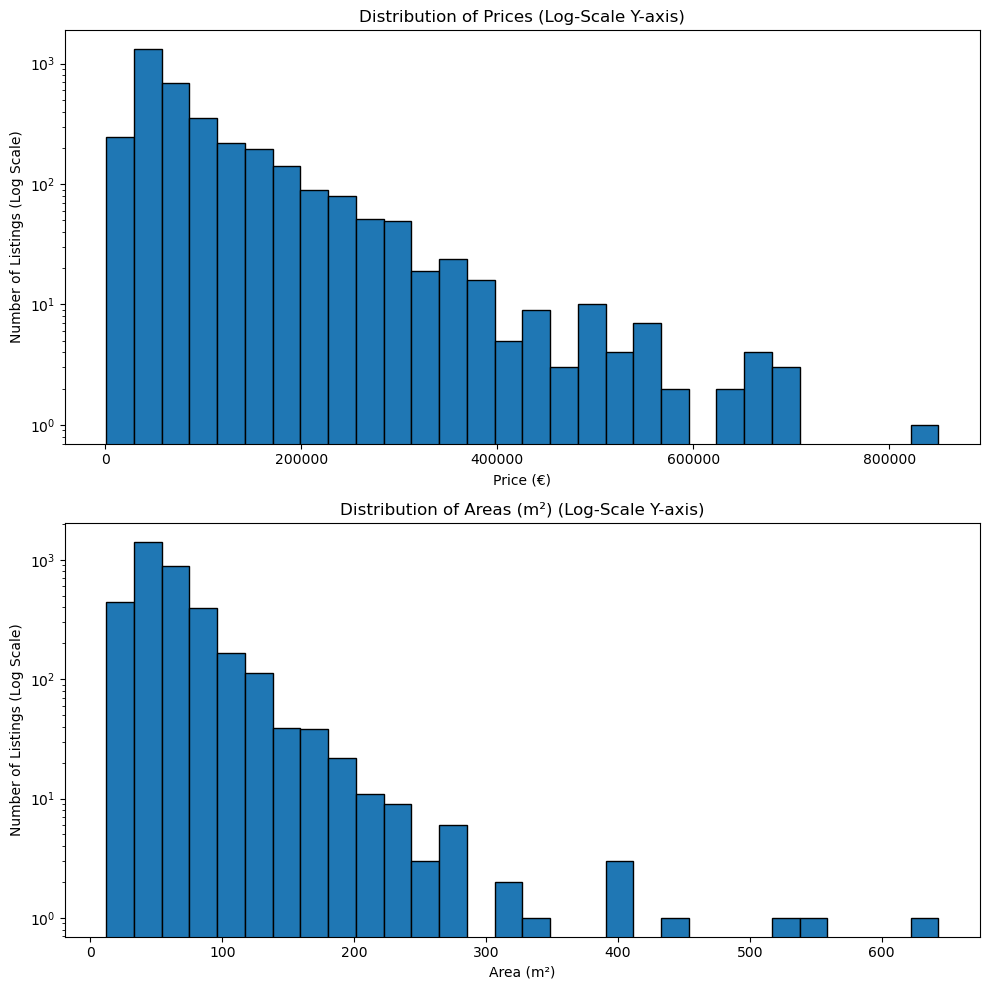

In [8]:
# Set up a 2x1 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Plot histogram for 'Cena' with log scale
df['Cena'].plot(ax=axes[0], kind='hist', edgecolor='black', bins=30, logy=True)
axes[0].set_title('Distribution of Prices (Log-Scale Y-axis)')
axes[0].set_xlabel('Price (€)')
axes[0].set_ylabel('Number of Listings (Log Scale)')

# Plot histogram for 'Platība' with log scale
df['Platība:'].plot(ax=axes[1], kind='hist', edgecolor='black', bins=30, logy=True)
axes[1].set_title('Distribution of Areas (m²) (Log-Scale Y-axis)')
axes[1].set_xlabel('Area (m²)')
axes[1].set_ylabel('Number of Listings (Log Scale)')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [9]:
# filter by price
subset_df = df[(df['Cena'] <= 200000) & (df['Platība:'] <= 200)]

# Data Analysis

In [10]:
average_price = df['Cena'].mean()
minimum_price = df['Cena'].min()
maximum_price = df['Cena'].max()

print(f"Average Price: €{average_price:.2f}")
print(f"Minimum Price: €{minimum_price:.2f}")
print(f"Maximum Price: €{maximum_price:.2f}")


Average Price: €97514.46
Minimum Price: €1110.00
Maximum Price: €850000.00


In [11]:
district_avg_prices = df.groupby('Rajons:')['Cena'].mean().sort_values(ascending=False)

print("Average Prices per District:\n", district_avg_prices)

most_expensive_district = district_avg_prices.idxmax()
least_expensive_district = district_avg_prices.idxmin()

print(f"\nMost Expensive District: {most_expensive_district} with an average price of €{district_avg_prices.max():.2f}")
print(f"Least Expensive District: {least_expensive_district} with an average price of €{district_avg_prices.min():.2f}")


Average Prices per District:
 Rajons:
Ķīpsala                   375000.000000
Vecāķi                    295000.000000
Klīversala                256611.764706
Vecrīga                   214773.333333
centrs                    157507.188940
Mežaparks                 145134.469697
Dreiliņi                  145000.000000
Berģi                     141655.000000
Bukulti                   138500.000000
Āgenskalns                125788.023669
Aplokciems                115350.000000
Bieriņi                   103857.142857
Mežciems                  101760.500000
Šampēteris-Pleskodāle     101328.410256
Teika                      98654.864516
Zolitūde                   96880.109890
Cits                       89000.000000
VEF                        89000.000000
Grīziņkalns                87077.777778
Ziepniekkalns              82790.642384
Rumbula                    78000.000000
Imanta                     76948.979381
Dzegužkalns                69549.107143
Pļavnieki                  69373.248869
Ju

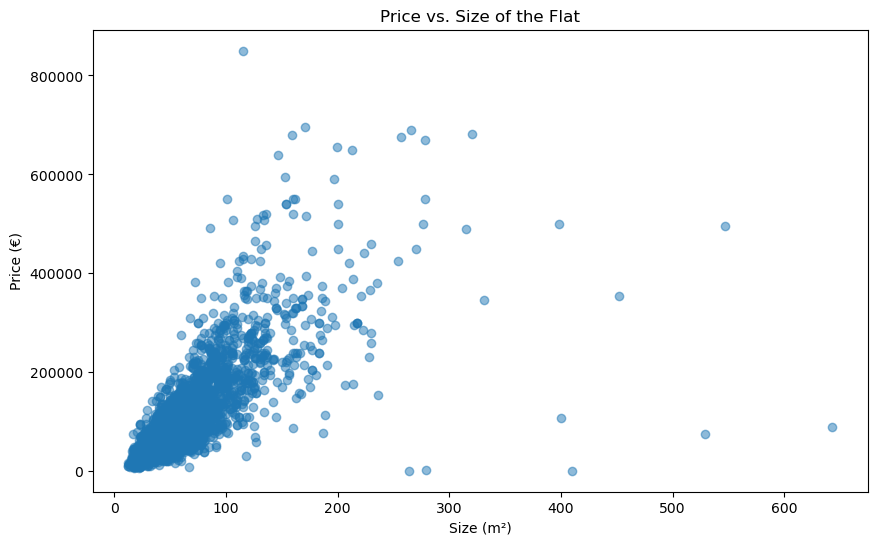

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Platība:'], df['Cena'], alpha=0.5)
plt.title('Price vs. Size of the Flat')
plt.xlabel('Size (m²)')
plt.ylabel('Price (€)')
plt.show()

<Figure size 1200x700 with 0 Axes>

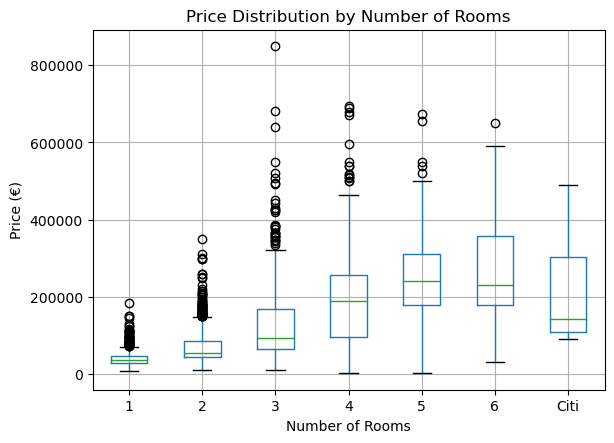

In [13]:
plt.figure(figsize=(12, 7))
df.boxplot(column='Cena', by='Istabas:')
plt.title('Price Distribution by Number of Rooms')
plt.suptitle('')  # Remove default title
plt.xlabel('Number of Rooms')
plt.ylabel('Price (€)')
plt.show()


### 1. Transform the amenities column:
### 2. Identify unique amenities:
### 3. Create a binary column for each amenity:
### 4. Analyze the impact of each amenity on the price:

In [14]:
df['Ērtības_list'] = df['Ērtības:'].str.split(',').apply(lambda x: [item.strip() for item in x] if isinstance(x, list) else x) # Convert the amenities to a list

In [15]:
unique_amenities = set()

for amenities in df['Ērtības_list']:
    if isinstance(amenities, list):  # This checks if the amenities value is a list
        unique_amenities.update(amenities)

# Remove any empty string entries
unique_amenities.discard('')


In [16]:
unique_amenities

{'Balkons', 'Lodžija', 'Parkošanas vieta', 'Pirts', 'Terase'}

In [17]:
unique_amenities = set()

# Replace NaNs with empty lists
df['Ērtības_list'] = df['Ērtības_list'].apply(lambda x: x if isinstance(x, list) else [])

for amenities in df['Ērtības_list']:
    if isinstance(amenities, list):  # Check if the value is a list before updating
        unique_amenities.update(amenities)

# Remove any empty string entries
unique_amenities.discard('')


In [18]:
for amenity in unique_amenities:
    df[f'has_{amenity}'] = df['Ērtības_list'].apply(lambda x: 1 if amenity in x else 0)


In [19]:
amenity_price_impact = {}

for amenity in unique_amenities:
    with_amenity_avg_price = df[df[f'has_{amenity}'] == 1]['Cena'].mean()
    without_amenity_avg_price = df[df[f'has_{amenity}'] == 0]['Cena'].mean()
    amenity_price_impact[amenity] = (with_amenity_avg_price, without_amenity_avg_price)

for amenity, prices in amenity_price_impact.items():
    print(f"Amenity: {amenity}")
    print(f"Average price with amenity: €{prices[0]:.2f}")
    print(f"Average price without amenity: €{prices[1]:.2f}")
    print("--------------------------")


Amenity: Lodžija
Average price with amenity: €79121.84
Average price without amenity: €104184.08
--------------------------
Amenity: Parkošanas vieta
Average price with amenity: €103357.47
Average price without amenity: €93196.59
--------------------------
Amenity: Balkons
Average price with amenity: €110774.99
Average price without amenity: €94304.85
--------------------------
Amenity: Pirts
Average price with amenity: €243189.47
Average price without amenity: €95938.70
--------------------------
Amenity: Terase
Average price with amenity: €214509.97
Average price without amenity: €89562.29
--------------------------


# Visualizations:

In [20]:
import json

# Load GeoJSON data
with open('../data/riga_districts_final.json', 'r', encoding='utf8') as file:
    geojson_data = json.load(file)

# Extract district names
district_names_from_geojson = [feature['properties']['apkaime'] for feature in geojson_data['features']]

print(district_names_from_geojson)

['Rumbula', 'Ķengarags', 'Čiekurkalns', 'Vecrīga', 'Dārziņi', 'Daugavgrīva', 'Šķirotava', 'Mangaļsala', 'Buļļi', 'Ķīpsala', 'Āgenskalns', 'Zolitūde', 'Ziepniekkalns', 'Zasulauks', 'Voleri', 'Vecāķi', 'Vecmīlgrāvis', 'Vecdaugava', 'Trīsciems', 'Torņakalns', 'Teika', 'Suži', 'Spilve', 'Sarkandaugava', 'Salas', 'Pļavnieki', 'Purvciems', 'Mūkupurvs', 'Mangaļi', 'Mežciems', 'Mežaparks', 'Maskavas priekšpilsēta', 'Kundziņsala', 'Kleisti', 'Katlakalns', 'Jugla', 'Jaunciems', 'Iļģuciems', 'Imanta', 'Grīziņkalns', 'Dārzciems', 'Dzegužkalns', 'Dreiliņi', 'Bukulti', 'Brekši', 'Bolderāja', 'Bieriņi', 'Berģi', 'Beberbeķi', 'Šampēteris-Pleskodāle', 'centrs']


In [21]:
import folium

In [24]:
avg_price_by_district = df.groupby('Rajons:')['Cena'].mean().reset_index()
# Create a map
m = folium.Map(location=[56.9496, 24.1052], zoom_start=11)  # Coordinates for Riga

# Add the choropleth layer
folium.Choropleth(
    geo_data=geojson_data,  # Pass the loaded and corrected geojson_data object here
    data=avg_price_by_district,
    columns=['Rajons:', 'Cena'],
    key_on='feature.properties.apkaime',  # This should match the name property in your GeoJSON
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Price by District'
).add_to(m)

m.save('../output/riga_district_prices.html')

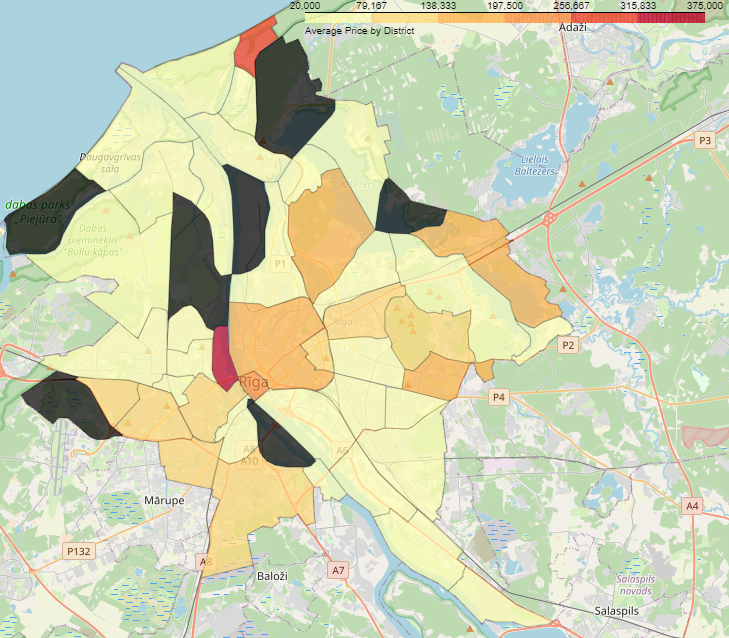

##### some missing districts

In [ ]:
# Assuming your dataframe is named df and the column with district names is 'Rajons'
district_names_from_df = df['Rajons:'].unique()

# Find district names that are in df but not in the GeoJSON
missing_from_geojson = [name for name in district_names_from_df if name not in district_names_from_geojson]

# Find district names that are in the GeoJSON but not in df
missing_from_df = [name for name in district_names_from_geojson if name not in district_names_from_df]

print("Names in DataFrame but not in GeoJSON:", missing_from_geojson)
print("Names in GeoJSON but not in DataFrame:", missing_from_df)


Names in DataFrame but not in GeoJSON: ['Krasta r-ns', 'Klīversala', 'Aplokciems', 'VEF', 'Jaunmīlgrāvis', 'Cits']
Names in GeoJSON but not in DataFrame: ['Buļļi', 'Trīsciems', 'Suži', 'Spilve', 'Salas', 'Mūkupurvs', 'Kundziņsala', 'Beberbeķi']


### GeoJSON merging districts examples

In [47]:
import json
from shapely.geometry import shape, mapping

# Load GeoJSON data
with open('riga_districts.json', 'r', encoding='utf8') as file:
    geojson_data = json.load(file)

# Identify the districts to merge
districts_to_merge = ["Šampēteris", "Pleskodāle"]
features_to_merge = [feature for feature in geojson_data['features'] if feature['properties']['apkaime'] in districts_to_merge]

# Convert to shapely geometries and merge
merged_geom = shape(features_to_merge[0]['geometry']).union(shape(features_to_merge[1]['geometry']))

# Create the merged feature
merged_feature = {
    "type": "Feature",
    "properties": {
        "gid": max([feature['properties']['gid'] for feature in features_to_merge]) + 1,  # Create a new gid for demonstration
        "apkaime": '-'.join(districts_to_merge)
    },
    "geometry": mapping(merged_geom)
}

# Remove the original features from the GeoJSON and append the merged one
geojson_data['features'] = [feature for feature in geojson_data['features'] if feature not in features_to_merge]
geojson_data['features'].append(merged_feature)

with open('modified_riga_districts.json', 'w', encoding='utf8') as file:
    # Write the beginning of the GeoJSON structure
    file.write('{"type": "FeatureCollection", "features": [\n')
    
    # Iterate through each feature and write it on a new line
    for i, feature in enumerate(geojson_data['features']):
        if i != 0:  # Not the first feature
            file.write(',\n')  # Add a comma for separation from the previous feature
        json.dump(feature, file, ensure_ascii=False)  # Write the feature as JSON

    # Close the JSON structure
    file.write('\n]}')


In [52]:
import geopandas as gpd

# Read the GeoJSON file
gdf = gpd.read_file('modified_riga_districts.json')

# List of districts to be merged
merge_list = ["Brasa", "Pētersala-Andrejsala", "Skanste", "Avoti", "centrs"]

# Filter out the districts to be merged
to_merge = gdf[gdf['apkaime'].isin(merge_list)]

# Union the geometries to create a single merged polygon
merged_geom = to_merge.unary_union

# Remove the individual districts from the GeoDataFrame
gdf = gdf[~gdf['apkaime'].isin(merge_list)]

# Add the merged polygon back into the GeoDataFrame with the 'Centrs' label
gdf = gdf.append({'apkaime': 'centrs', 'geometry': merged_geom}, ignore_index=True)

# Save the updated GeoDataFrame back to a new GeoJSON file
gdf.to_file("riga_districts_merged.json", driver='GeoJSON')


C:\Users\i7-6700K GTX1080 8GB\AppData\Local\Temp\ipykernel_7436\1825882559.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append({'apkaime': 'centrs', 'geometry': merged_geom}, ignore_index=True)


In [83]:
import geopandas as gpd

# Read the GeoJSON file
gdf = gpd.read_file('riga_districts_merged.json')  # Note: Use the latest version of your GeoJSON file

# List of districts to be merged into Ziepniekkalns
merge_list = ["Atgāzene", "Bišumuiža", "Ziepniekkalns"]

# Filter out the districts to be merged
to_merge = gdf[gdf['apkaime'].isin(merge_list)]

# Union the geometries to create a single merged polygon
merged_geom = to_merge.unary_union

# Remove the individual districts from the GeoDataFrame
gdf = gdf[~gdf['apkaime'].isin(merge_list[:-1])]  # Do not remove Ziepniekkalns as it's the district we're merging into

# Replace the geometry of Ziepniekkalns with the merged geometry
gdf.loc[gdf['apkaime'] == 'Ziepniekkalns', 'geometry'] = merged_geom

# Save the updated GeoDataFrame back to a new GeoJSON file
gdf.to_file("riga_districts_final.json", driver='GeoJSON')
